# Detecting CCTV Camera Focus Issues Using Laplacian 

In a large facility such as commercial building, you typically have few hundreds of CCTV cameras.
One of the primary job of the operator is the check whether the cameras are properly focused. Often times focus gets disturbed by gusts and maintenance activities
I'm trying to use OpenCV to detect whether the camera focus is right using blurrie ness of an image

## Check the blur level of the images

In [9]:
images_folder = r'.\images'

In [10]:
import matplotlib.pyplot as plt
import os
import fnmatch
import math
import cv2
import numpy as np
%matplotlib inline

In [11]:
listOfFiles = os.listdir(images_folder)  
pattern = "*.jpg"
image_file_names = []
image_file_paths = []
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
            image_file_paths.append(os.path.join(images_folder, entry))
            image_file_names.append(entry)
print('total images: ',len(image_file_names))

total images:  9


## Original images

In [29]:
def show_images(imagelist, titles):
    plt.close('all')
    columns = 3
    rows = math.ceil(len(imagelist)/3)
    f, axarr = plt.subplots(rows, columns, figsize=(15,15))
    axarr = axarr.reshape(rows, columns) # to avoid issues only only 1 row i.e. only 3 images
    for row in range(rows):
        for col in range(columns):
            index = row*columns+col
            
            if index >= len(imagelist):
                break
            
            a = plt.imread(imagelist[index])
            if titles:
                #print('accessing title at:', index, '. title:', titles[index])
                axarr[row, col].set_title(str(titles[index]))
            
            axarr[row, col].axis('off')
            # plot on relevant subplot
            axarr[row, col].imshow(a)
    plt.tight_layout()

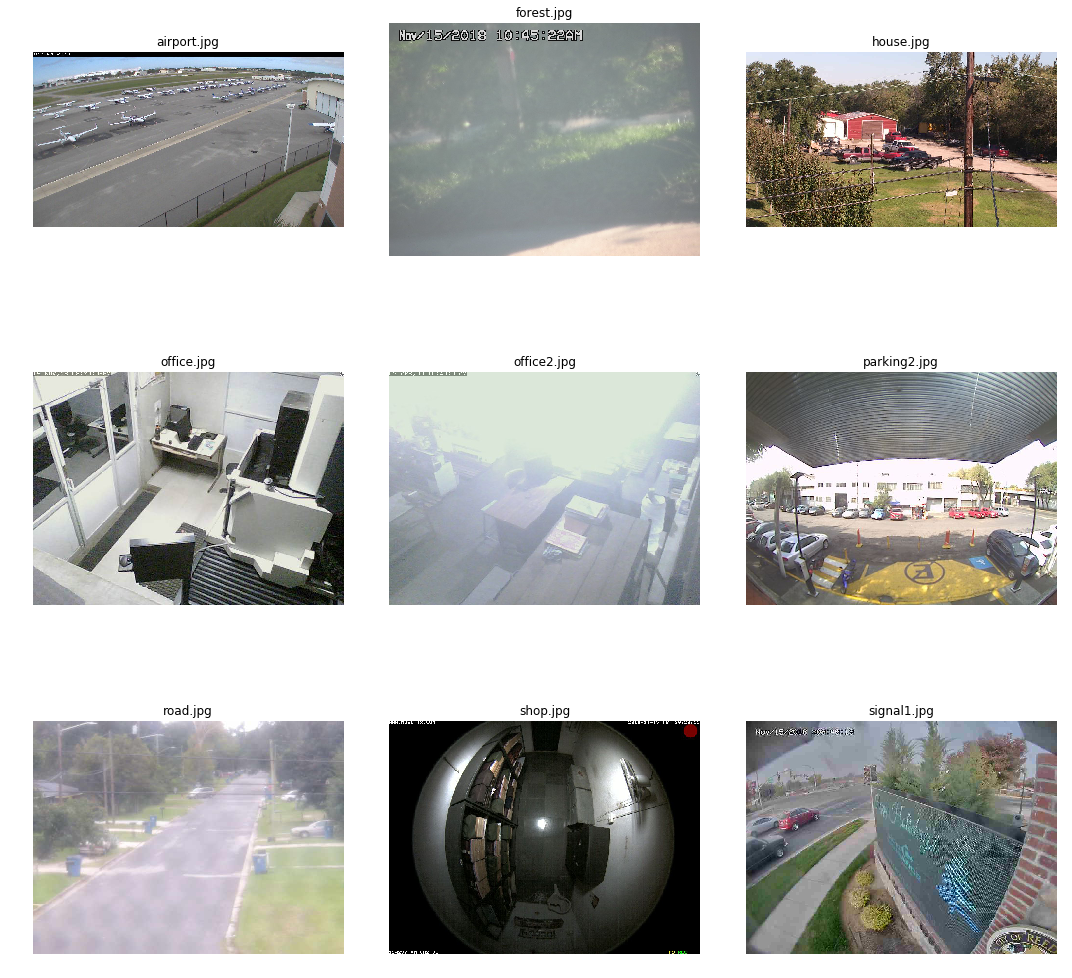

In [30]:
show_images(image_file_paths, image_file_names)

## Detecting blurry images

In [31]:
def get_blurlevels(image_file_names):
    blur_levels = []
    
    for imagefile in image_file_names:
        #load image, convert it to grayscale
        
        image = cv2.imread(imagefile)
        if image is None:
            print('unable to read image:', imagefile)
            continue
            
        #image = cv2.resize(image,(640,480))
        if len(image.shape) == 3:
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            gray = image
        
        #calculate the laplacian of the image (derivatives in x and y directions)
        derivative = cv2.Laplacian(gray, cv2.CV_64F)
        #print('image dimensions:', image.shape, ', blur level:', derivative.std()/(np.sqrt(image.shape[0]*image.shape[1])))
        #print('image:', imagefile)
        #score is calculated using variance of Laplacian and variance is normalized by image size        
        blur_levels.append(derivative.var()/np.sqrt(image.shape[0]*image.shape[1])) 
    return blur_levels

In [32]:
blur_levels = get_blurlevels(image_file_paths)

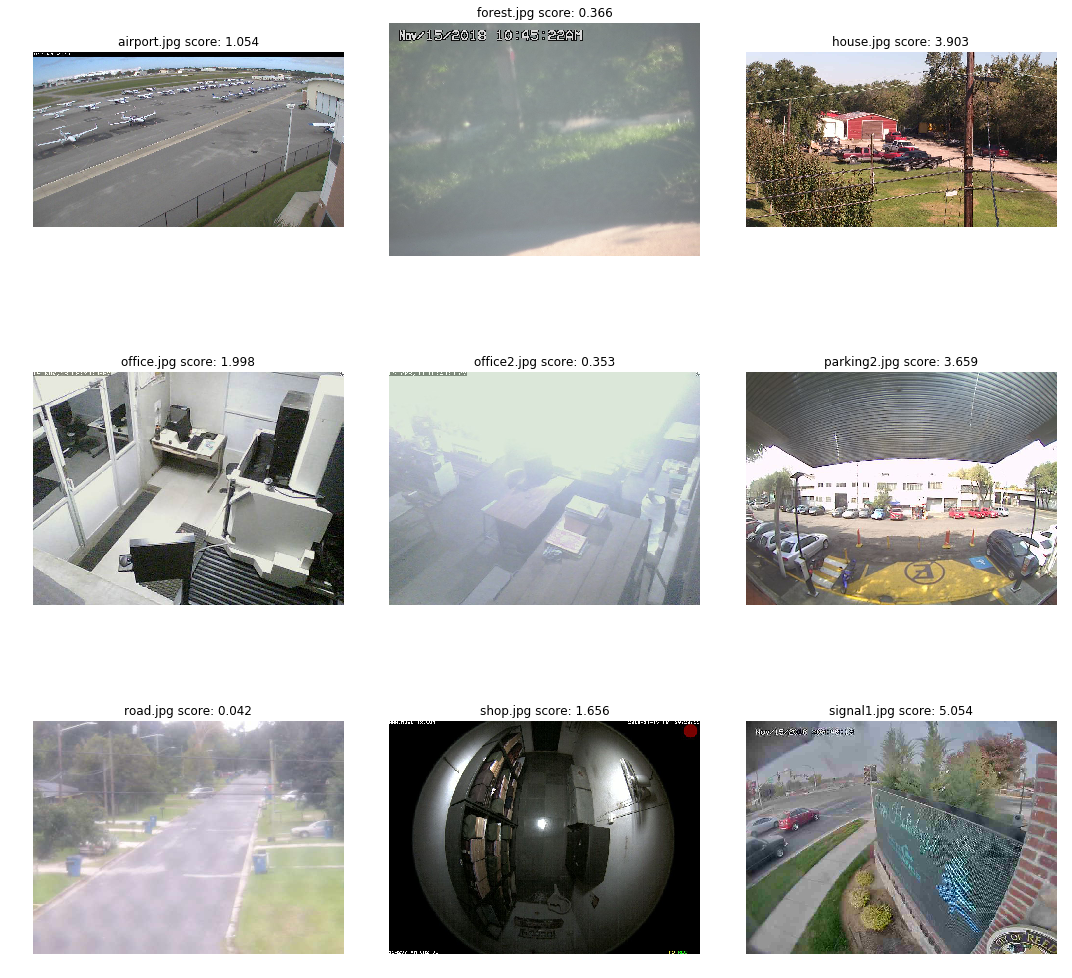

In [33]:
show_images(image_file_paths, list('{0} score: {1:.3f}'.format(f[0], f[1]) for f in zip(image_file_names, blur_levels )))

### Displaying Blurry Images
From above we can see the that score < 1 indicates the images are blurry, let us find out really blurry images

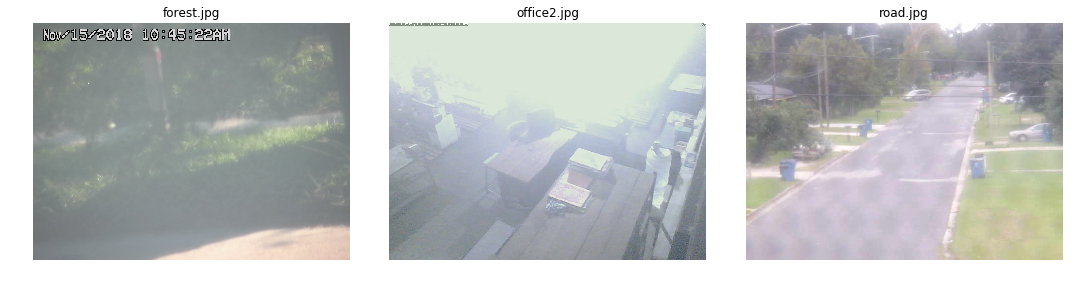

In [36]:
blurry_images = np.array(image_file_names)[np.array(blur_levels) < 1.0]
blurry_paths = np.array(image_file_paths)[np.array(blur_levels) < 1.0]
show_images(blurry_paths, list(blurry_images))